이번 강좌에서는 컨볼루션 신경망 모델에서 주로 사용되는 Convolution 레이어, Max Pooling 레이어, Flatten 레이어에 대해서 알아보겠습니다. 각 레이어별로 레이어 구성 및 역할에 대해서 알아보겠습니다.

---

### 필터로 특징을 뽑아주는 Convolution 레이어

케라스에서 제공되는 Convolution 레이어 종류에도 여러가지가 있으나 영상 처리에 주로 사용되는 Convolution2D 레이어를 살펴보겠습니다. 레이어는 영상 인식에 주로 사용되며, 필터가 탑재되어 있습니다. 아래는 Convolution2D 클래스 사용 예제입니다.

    Convolution2D(32, 5, 5, border_mode='valid', input_shape=(1, 28, 28), activation='relu')
    
주요 인자는 다음과 같습니다.
* 첫번째 인자 : 출력 뉴런의 수
* 두번째 인자 : 
* 세번째 인자 : 
* border_mode :
* input_shape : 
    * uniform : 균일 분포
    * normal : 가우시안 분포
* activation : 활성화 함수 설정
    * linear : 디폴트 값, 입력뉴런과 가중치로 계산된 결과값이 그대로 출력으로 나옴
    * relu : rectifier 함수, 은익층에 주로 쓰임
    * sigmoid : 시그모이드 함수, 이진 분류 문제에서 출력층에 주로 쓰임
    * softmax : 소프트맥스 함수, 다중 클래스 분류 문제에서 출력층에 주로 쓰임
   

# create model
model = Sequential()
model.add(Convolution2D(32, 5, 5, border_mode='valid', input_shape=(1, 28, 28), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))


Convolution2D

keras.layers.convolutional.Convolution2D(nb_filter, nb_row, nb_col, init='glorot_uniform', activation=None, weights=None, border_mode='valid', subsample=(1, 1), dim_ordering='default', W_regularizer=None, b_regularizer=None, activity_regularizer=None, W_constraint=None, b_constraint=None, bias=True)
Convolution operator for filtering windows of two-dimensional inputs. When using this layer as the first layer in a model, provide the keyword argument input_shape (tuple of integers, does not include the sample axis), e.g.  input_shape=(3, 128, 128) for 128x128 RGB pictures.

Examples

# apply a 3x3 convolution with 64 output filters on a 256x256 image:
model = Sequential()
model.add(Convolution2D(64, 3, 3, border_mode='same', input_shape=(3, 256, 256)))
# now model.output_shape == (None, 64, 256, 256)

# add a 3x3 convolution on top, with 32 output filters:
model.add(Convolution2D(32, 3, 3, border_mode='same'))
# now model.output_shape == (None, 32, 256, 256)
Arguments

nb_filter: Number of convolution filters to use.
nb_row: Number of rows in the convolution kernel.
nb_col: Number of columns in the convolution kernel.
init: name of initialization function for the weights of the layer (see initializations), or alternatively, Theano function to use for weights initialization. This parameter is only relevant if you don't pass a weights argument.
activation: name of activation function to use (see activations), or alternatively, elementwise Theano function. If you don't specify anything, no activation is applied (ie. "linear" activation: a(x) = x).
weights: list of numpy arrays to set as initial weights.
border_mode: 'valid', 'same' or 'full'. ('full' requires the Theano backend.)
subsample: tuple of length 2. Factor by which to subsample output. Also called strides elsewhere.
W_regularizer: instance of WeightRegularizer (eg. L1 or L2 regularization), applied to the main weights matrix.
b_regularizer: instance of WeightRegularizer, applied to the bias.
activity_regularizer: instance of ActivityRegularizer, applied to the network output.
W_constraint: instance of the constraints module (eg. maxnorm, nonneg), applied to the main weights matrix.
b_constraint: instance of the constraints module, applied to the bias.
dim_ordering: 'th' or 'tf'. In 'th' mode, the channels dimension (the depth) is at index 1, in 'tf' mode is it at index 3. It defaults to the image_dim_ordering value found in your Keras config file at ~/.keras/keras.json. If you never set it, then it will be "tf".
bias: whether to include a bias (i.e. make the layer affine rather than linear).
Input shape

4D tensor with shape: (samples, channels, rows, cols) if dim_ordering='th' or 4D tensor with shape: (samples, rows, cols, channels) if dim_ordering='tf'.

Output shape

4D tensor with shape: (samples, nb_filter, new_rows, new_cols) if dim_ordering='th' or 4D tensor with shape: (samples, new_rows, new_cols, nb_filter) if dim_ordering='tf'. rows and cols values might have changed due to padding.

필터가 탑재되어 있어 입력되는 입력과 출력을 모두 연결해줍니다. 예를 들어 입력 뉴런이 4개, 출력 뉴런이 8개있다면 총 연결선은 32개(4*8=32) 입니다. 이를 그림으로 표시하면 다음과 같습니다. 

각 연결선에는 가중치(weight)를 포함하고 있는데, 이 가중치가 나타내는 의미는 연결강도라고 보시면 됩니다. 현재 연결선이 32개이므로 가중치도 32개입니다.

> 가중치가 높을수록 해당 입력 뉴런이 출력 뉴런에 미치는 영향이 크고, 낮을수록 미치는 영향이 적다.

예를 들어 성별을 판단하는 문제있어서, 출력 뉴런의 값이 성별을 의미하고, 입력 뉴런에 머리카락길이, 키, 혈핵형 등이 있다고 가정했을 때, 머리카락길이의 가중치가 가장 높고, 키의 가중치가 중간이고, 혈핵형의 가중치가 가장 낮을 겁니다. 딥러닝 학습과정에서 이러한 가중치들이 조정됩니다.

이렇게 입력 뉴런과 출력 뉴런을 모두 연결한다고 해서 전결합층이라고 불리고, 케라스에서는 Dense라는 클래스로 구현이 되어 있습니다. 아래는 Dense 클래스 사용 예제입니다.

    Dense(8, input_dim=4, init='uniform', activation='relu'))

주요 인자는 다음과 같습니다.
* 첫번째 인자 : 출력 뉴런의 수
* input_dim : 입력 뉴런의 수
* init : 가중치 초기화 방법 설정
    * uniform : 균일 분포
    * normal : 가우시안 분포
* activation : 활성화 함수 설정
    * linear : 디폴트 값, 입력뉴런과 가중치로 계산된 결과값이 그대로 출력으로 나옴
    * relu : rectifier 함수, 은익층에 주로 쓰임
    * sigmoid : 시그모이드 함수, 이진 분류 문제에서 출력층에 주로 쓰임
    * softmax : 소프트맥스 함수, 다중 클래스 분류 문제에서 출력층에 주로 쓰임

Dense 레이어는 입력 뉴런 수에 상관없이 출력 뉴런 수를 자유롭게 설정할 수 있기 때문에 출력층으로 많이 사용됩니다. 이진 분류문제에서는 0과 1을 나타내는 출력 뉴런이 하나만 있으면 되기 때문에 아래 코드처럼 출력 뉴런이 1개이고, 입력 뉴런과 가중치를 계산한 값을 0에서 1사이로 표현할 수 있는 활성화 함수인 sigmoid을 사용합니다.

    Dense(1, input_dim=3, activation='sigmoid'))

다중클래스 분류문제에서는 클래스 수만큼 출력 뉴런이 필요합니다. 만약 세가지 종류로 분류한다면, 아래 코드처럼 출력 뉴런이 3개이고, 입력 뉴련과 가중치를 계산한 값을 각 클래스의 확률 개념으로 표현할 수 있는 활성화 함수인 sofemax를 사용합니다.

    Dense(3, input_dim=6, activation='softmax'))

Dense 레이어는 보통 출력층 이전의 은닉층으로도 많이 쓰이고, 영상이 아닌 수치자료 입력 시에는 입력층으로도 많이 쓰입니다. 이 때 활성화 함수로 'relu'가 주로 사용됩니다. 'relu'는 학습과정에서 역전파 시에 좋은 성능이 나는 것으로 알려져 있습니다.

    Dense(6, input_dim = 4, activation='relu'))

또한 입력층이 아닐 때에는 이전층의 출력 뉴런 수를 알 수 있기 때문에 input_dim을 지정하지 않아도 됩니다. 아래 코드를 보면, 입력층에만 input_dim을 정의하였고, 이후 층에서는 input_dim을 지정하지 않았습니다.

    model.add(Dense(8, input_dim=4, init='uniform', activation='relu'))
    model.add(Dense(6, init='uniform', activation='relu'))
    model.add(Dense(1, init='uniform', activation='sigmoid'))
    
Convolution2D(2, 3, 3, border_mode='valid', input_shape=(1, 6, 6), activation='relu')

Convolution2D(2, 3, 3, border_mode='valid', input_shape=(1, 6, 6), activation='relu')

---

### 사소한 변화따위 무시해주는 MaxPooling Layer

Dense 레이어는 입력과 출력을 모두 연결해줍니다. 예를 들어 입력 뉴런이 4개, 출력 뉴런이 8개있다면 총 연결선은 32개(4*8=32) 입니다. 이를 그림으로 표시하면 다음과 같습니다. 

각 연결선에는 가중치(weight)를 포함하고 있는데, 이 가중치가 나타내는 의미는 연결강도라고 보시면 됩니다. 현재 연결선이 32개이므로 가중치도 32개입니다.

> 가중치가 높을수록 해당 입력 뉴런이 출력 뉴런에 미치는 영향이 크고, 낮을수록 미치는 영향이 적다.

예를 들어 성별을 판단하는 문제있어서, 출력 뉴런의 값이 성별을 의미하고, 입력 뉴런에 머리카락길이, 키, 혈핵형 등이 있다고 가정했을 때, 머리카락길이의 가중치가 가장 높고, 키의 가중치가 중간이고, 혈핵형의 가중치가 가장 낮을 겁니다. 딥러닝 학습과정에서 이러한 가중치들이 조정됩니다.

이렇게 입력 뉴런과 출력 뉴런을 모두 연결한다고 해서 전결합층이라고 불리고, 케라스에서는 Dense라는 클래스로 구현이 되어 있습니다. 아래는 Dense 클래스 사용 예제입니다.

    Dense(8, input_dim=4, init='uniform', activation='relu'))

주요 인자는 다음과 같습니다.
* 첫번째 인자 : 출력 뉴런의 수
* input_dim : 입력 뉴런의 수
* init : 가중치 초기화 방법 설정
    * uniform : 균일 분포
    * normal : 가우시안 분포
* activation : 활성화 함수 설정
    * linear : 디폴트 값, 입력뉴런과 가중치로 계산된 결과값이 그대로 출력으로 나옴
    * relu : rectifier 함수, 은익층에 주로 쓰임
    * sigmoid : 시그모이드 함수, 이진 분류 문제에서 출력층에 주로 쓰임
    * softmax : 소프트맥스 함수, 다중 클래스 분류 문제에서 출력층에 주로 쓰임

Dense 레이어는 입력 뉴런 수에 상관없이 출력 뉴런 수를 자유롭게 설정할 수 있기 때문에 출력층으로 많이 사용됩니다. 이진 분류문제에서는 0과 1을 나타내는 출력 뉴런이 하나만 있으면 되기 때문에 아래 코드처럼 출력 뉴런이 1개이고, 입력 뉴런과 가중치를 계산한 값을 0에서 1사이로 표현할 수 있는 활성화 함수인 sigmoid을 사용합니다.

    Dense(1, input_dim=3, activation='sigmoid'))

다중클래스 분류문제에서는 클래스 수만큼 출력 뉴런이 필요합니다. 만약 세가지 종류로 분류한다면, 아래 코드처럼 출력 뉴런이 3개이고, 입력 뉴련과 가중치를 계산한 값을 각 클래스의 확률 개념으로 표현할 수 있는 활성화 함수인 sofemax를 사용합니다.

    Dense(3, input_dim=6, activation='softmax'))

Dense 레이어는 보통 출력층 이전의 은닉층으로도 많이 쓰이고, 영상이 아닌 수치자료 입력 시에는 입력층으로도 많이 쓰입니다. 이 때 활성화 함수로 'relu'가 주로 사용됩니다. 'relu'는 학습과정에서 역전파 시에 좋은 성능이 나는 것으로 알려져 있습니다.

    Dense(6, input_dim = 4, activation='relu'))

또한 입력층이 아닐 때에는 이전층의 출력 뉴런 수를 알 수 있기 때문에 input_dim을 지정하지 않아도 됩니다. 아래 코드를 보면, 입력층에만 input_dim을 정의하였고, 이후 층에서는 input_dim을 지정하지 않았습니다.

    model.add(Dense(8, input_dim=4, init='uniform', activation='relu'))
    model.add(Dense(6, init='uniform', activation='relu'))
    model.add(Dense(1, init='uniform', activation='sigmoid'))

MaxPooling2D(pool_size=(2, 2)

---

### 골고루 학습시켜주는 Dropout Layer

Dense 레이어는 입력과 출력을 모두 연결해줍니다. 예를 들어 입력 뉴런이 4개, 출력 뉴런이 8개있다면 총 연결선은 32개(4*8=32) 입니다. 이를 그림으로 표시하면 다음과 같습니다. 

각 연결선에는 가중치(weight)를 포함하고 있는데, 이 가중치가 나타내는 의미는 연결강도라고 보시면 됩니다. 현재 연결선이 32개이므로 가중치도 32개입니다.

> 가중치가 높을수록 해당 입력 뉴런이 출력 뉴런에 미치는 영향이 크고, 낮을수록 미치는 영향이 적다.

예를 들어 성별을 판단하는 문제있어서, 출력 뉴런의 값이 성별을 의미하고, 입력 뉴런에 머리카락길이, 키, 혈핵형 등이 있다고 가정했을 때, 머리카락길이의 가중치가 가장 높고, 키의 가중치가 중간이고, 혈핵형의 가중치가 가장 낮을 겁니다. 딥러닝 학습과정에서 이러한 가중치들이 조정됩니다.

이렇게 입력 뉴런과 출력 뉴런을 모두 연결한다고 해서 전결합층이라고 불리고, 케라스에서는 Dense라는 클래스로 구현이 되어 있습니다. 아래는 Dense 클래스 사용 예제입니다.

    Dense(8, input_dim=4, init='uniform', activation='relu'))

주요 인자는 다음과 같습니다.
* 첫번째 인자 : 출력 뉴런의 수
* input_dim : 입력 뉴런의 수
* init : 가중치 초기화 방법 설정
    * uniform : 균일 분포
    * normal : 가우시안 분포
* activation : 활성화 함수 설정
    * linear : 디폴트 값, 입력뉴런과 가중치로 계산된 결과값이 그대로 출력으로 나옴
    * relu : rectifier 함수, 은익층에 주로 쓰임
    * sigmoid : 시그모이드 함수, 이진 분류 문제에서 출력층에 주로 쓰임
    * softmax : 소프트맥스 함수, 다중 클래스 분류 문제에서 출력층에 주로 쓰임

Dense 레이어는 입력 뉴런 수에 상관없이 출력 뉴런 수를 자유롭게 설정할 수 있기 때문에 출력층으로 많이 사용됩니다. 이진 분류문제에서는 0과 1을 나타내는 출력 뉴런이 하나만 있으면 되기 때문에 아래 코드처럼 출력 뉴런이 1개이고, 입력 뉴런과 가중치를 계산한 값을 0에서 1사이로 표현할 수 있는 활성화 함수인 sigmoid을 사용합니다.

    Dense(1, input_dim=3, activation='sigmoid'))

다중클래스 분류문제에서는 클래스 수만큼 출력 뉴런이 필요합니다. 만약 세가지 종류로 분류한다면, 아래 코드처럼 출력 뉴런이 3개이고, 입력 뉴련과 가중치를 계산한 값을 각 클래스의 확률 개념으로 표현할 수 있는 활성화 함수인 sofemax를 사용합니다.

    Dense(3, input_dim=6, activation='softmax'))

Dense 레이어는 보통 출력층 이전의 은닉층으로도 많이 쓰이고, 영상이 아닌 수치자료 입력 시에는 입력층으로도 많이 쓰입니다. 이 때 활성화 함수로 'relu'가 주로 사용됩니다. 'relu'는 학습과정에서 역전파 시에 좋은 성능이 나는 것으로 알려져 있습니다.

    Dense(6, input_dim = 4, activation='relu'))

또한 입력층이 아닐 때에는 이전층의 출력 뉴런 수를 알 수 있기 때문에 input_dim을 지정하지 않아도 됩니다. 아래 코드를 보면, 입력층에만 input_dim을 정의하였고, 이후 층에서는 input_dim을 지정하지 않았습니다.

    model.add(Dense(8, input_dim=4, init='uniform', activation='relu'))
    model.add(Dense(6, init='uniform', activation='relu'))
    model.add(Dense(1, init='uniform', activation='sigmoid'))
    
Dropout(0.2)

---

### 다차원을 일차원으로 바꿔주는 Flatten Layer

Flatten()

Dense 레이어는 입력과 출력을 모두 연결해줍니다. 예를 들어 입력 뉴런이 4개, 출력 뉴런이 8개있다면 총 연결선은 32개(4*8=32) 입니다. 이를 그림으로 표시하면 다음과 같습니다. 

각 연결선에는 가중치(weight)를 포함하고 있는데, 이 가중치가 나타내는 의미는 연결강도라고 보시면 됩니다. 현재 연결선이 32개이므로 가중치도 32개입니다.

> 가중치가 높을수록 해당 입력 뉴런이 출력 뉴런에 미치는 영향이 크고, 낮을수록 미치는 영향이 적다.

예를 들어 성별을 판단하는 문제있어서, 출력 뉴런의 값이 성별을 의미하고, 입력 뉴런에 머리카락길이, 키, 혈핵형 등이 있다고 가정했을 때, 머리카락길이의 가중치가 가장 높고, 키의 가중치가 중간이고, 혈핵형의 가중치가 가장 낮을 겁니다. 딥러닝 학습과정에서 이러한 가중치들이 조정됩니다.

이렇게 입력 뉴런과 출력 뉴런을 모두 연결한다고 해서 전결합층이라고 불리고, 케라스에서는 Dense라는 클래스로 구현이 되어 있습니다. 아래는 Dense 클래스 사용 예제입니다.

    Dense(8, input_dim=4, init='uniform', activation='relu'))

주요 인자는 다음과 같습니다.
* 첫번째 인자 : 출력 뉴런의 수
* input_dim : 입력 뉴런의 수
* init : 가중치 초기화 방법 설정
    * uniform : 균일 분포
    * normal : 가우시안 분포
* activation : 활성화 함수 설정
    * linear : 디폴트 값, 입력뉴런과 가중치로 계산된 결과값이 그대로 출력으로 나옴
    * relu : rectifier 함수, 은익층에 주로 쓰임
    * sigmoid : 시그모이드 함수, 이진 분류 문제에서 출력층에 주로 쓰임
    * softmax : 소프트맥스 함수, 다중 클래스 분류 문제에서 출력층에 주로 쓰임

Dense 레이어는 입력 뉴런 수에 상관없이 출력 뉴런 수를 자유롭게 설정할 수 있기 때문에 출력층으로 많이 사용됩니다. 이진 분류문제에서는 0과 1을 나타내는 출력 뉴런이 하나만 있으면 되기 때문에 아래 코드처럼 출력 뉴런이 1개이고, 입력 뉴런과 가중치를 계산한 값을 0에서 1사이로 표현할 수 있는 활성화 함수인 sigmoid을 사용합니다.

    Dense(1, input_dim=3, activation='sigmoid'))

다중클래스 분류문제에서는 클래스 수만큼 출력 뉴런이 필요합니다. 만약 세가지 종류로 분류한다면, 아래 코드처럼 출력 뉴런이 3개이고, 입력 뉴련과 가중치를 계산한 값을 각 클래스의 확률 개념으로 표현할 수 있는 활성화 함수인 sofemax를 사용합니다.

    Dense(3, input_dim=6, activation='softmax'))

Dense 레이어는 보통 출력층 이전의 은닉층으로도 많이 쓰이고, 영상이 아닌 수치자료 입력 시에는 입력층으로도 많이 쓰입니다. 이 때 활성화 함수로 'relu'가 주로 사용됩니다. 'relu'는 학습과정에서 역전파 시에 좋은 성능이 나는 것으로 알려져 있습니다.

    Dense(6, input_dim = 4, activation='relu'))

또한 입력층이 아닐 때에는 이전층의 출력 뉴런 수를 알 수 있기 때문에 input_dim을 지정하지 않아도 됩니다. 아래 코드를 보면, 입력층에만 input_dim을 정의하였고, 이후 층에서는 input_dim을 지정하지 않았습니다.

    model.add(Dense(8, input_dim=4, init='uniform', activation='relu'))
    model.add(Dense(6, init='uniform', activation='relu'))
    model.add(Dense(1, init='uniform', activation='sigmoid'))

In [3]:
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

import numpy

from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot

Using Theano backend.


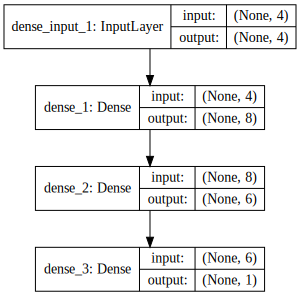

In [4]:
model = Sequential()

model.add(Dense(8, input_dim=4, init='uniform', activation='relu'))
model.add(Dense(6, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid'))

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [5]:
# create model
model = Sequential()
model.add(Convolution2D(2, 3, 3, border_mode='valid', input_shape=(1, 6, 6), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(6, activation='relu'))
model.add(Dense(4, activation='softmax'))

model_to_dot(model, show_shapes=True).create(prog='dot', format='svg')

'<?xml version="1.0" encoding="UTF-8" standalone="no"?>\n<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"\n "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">\n<!-- Generated by graphviz version 2.40.1 (20161225.0304)\n -->\n<!-- Title: G Pages: 1 -->\n<svg width="378pt" height="539pt"\n viewBox="0.00 0.00 377.56 539.00" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink">\n<g id="graph0" class="graph" transform="scale(1 1) rotate(0) translate(4 535)">\n<title>G</title>\n<polygon fill="#ffffff" stroke="transparent" points="-4,4 -4,-535 373.5625,-535 373.5625,4 -4,4"/>\n<!-- 4464543056 -->\n<g id="node1" class="node">\n<title>4464543056</title>\n<polygon fill="none" stroke="#000000" points="0,-486.5 0,-530.5 369.5625,-530.5 369.5625,-486.5 0,-486.5"/>\n<text text-anchor="middle" x="108.1226" y="-504.3" font-family="Times,serif" font-size="14.00" fill="#000000">convolution2d_input_1: InputLayer</text>\n<polyline fill="none" stroke="#000000" points="216.2451,-486.

---

### 같이 보기

* [강좌 목차](https://tykimos.github.io/Keras/2017/01/27/Keras_Lecture_Contents/)
* 이전 : [딥러닝 이야기/케라스 이야기](https://tykimos.github.io/Keras/2017/01/27/Keras_Talk/)
* 다음 : [딥러닝 이야기/다층 퍼셉트론 레이어 이야기](https://tykimos.github.io/Keras/2017/01/27/MLP_Layer_Talk/)